<h1> Erowid Data Collection </h1>

Raw data found from: https://erowid.org/experiences/

<h6> Erowid E, Erowid F. "The Value of Experience". Erowid Extracts. Jun 2006;10:14-19. </h1>

<br>

<h3> Table of all reports </h3>

You can find a webpage with a table of all the Erowid reports with the url below by setting the 'Max=' to above the number of reports in the Erowid Database. In my case, there were 38907 reports (scraped 10/11/2022 - 12/11/2022), so I set to 40000.

https://erowid.org/experiences/exp.cgi?ShowViews=0&Cellar=0&Start=0&Max=40000

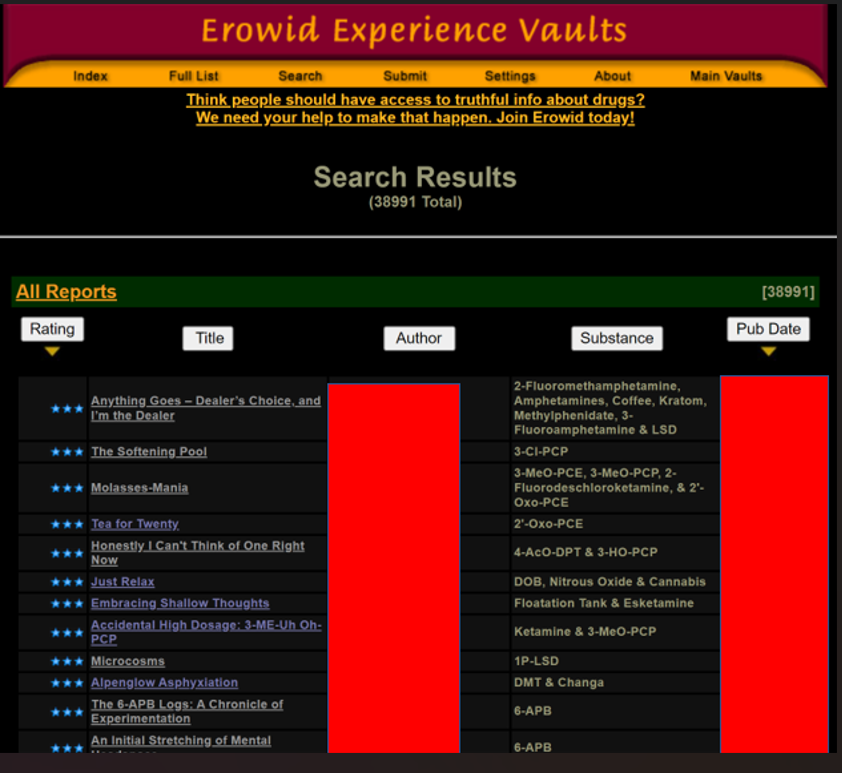


<br>

<h3> Web Scraping </h3>

The code below scrapes the title, url and substance of each row from the table above. (Author and publication date are not scraped for anonymity reasons). Each url leads to a report page. The main document text of this page is scraped.

The title, substances used, url, and document text is saved in a dataframe.

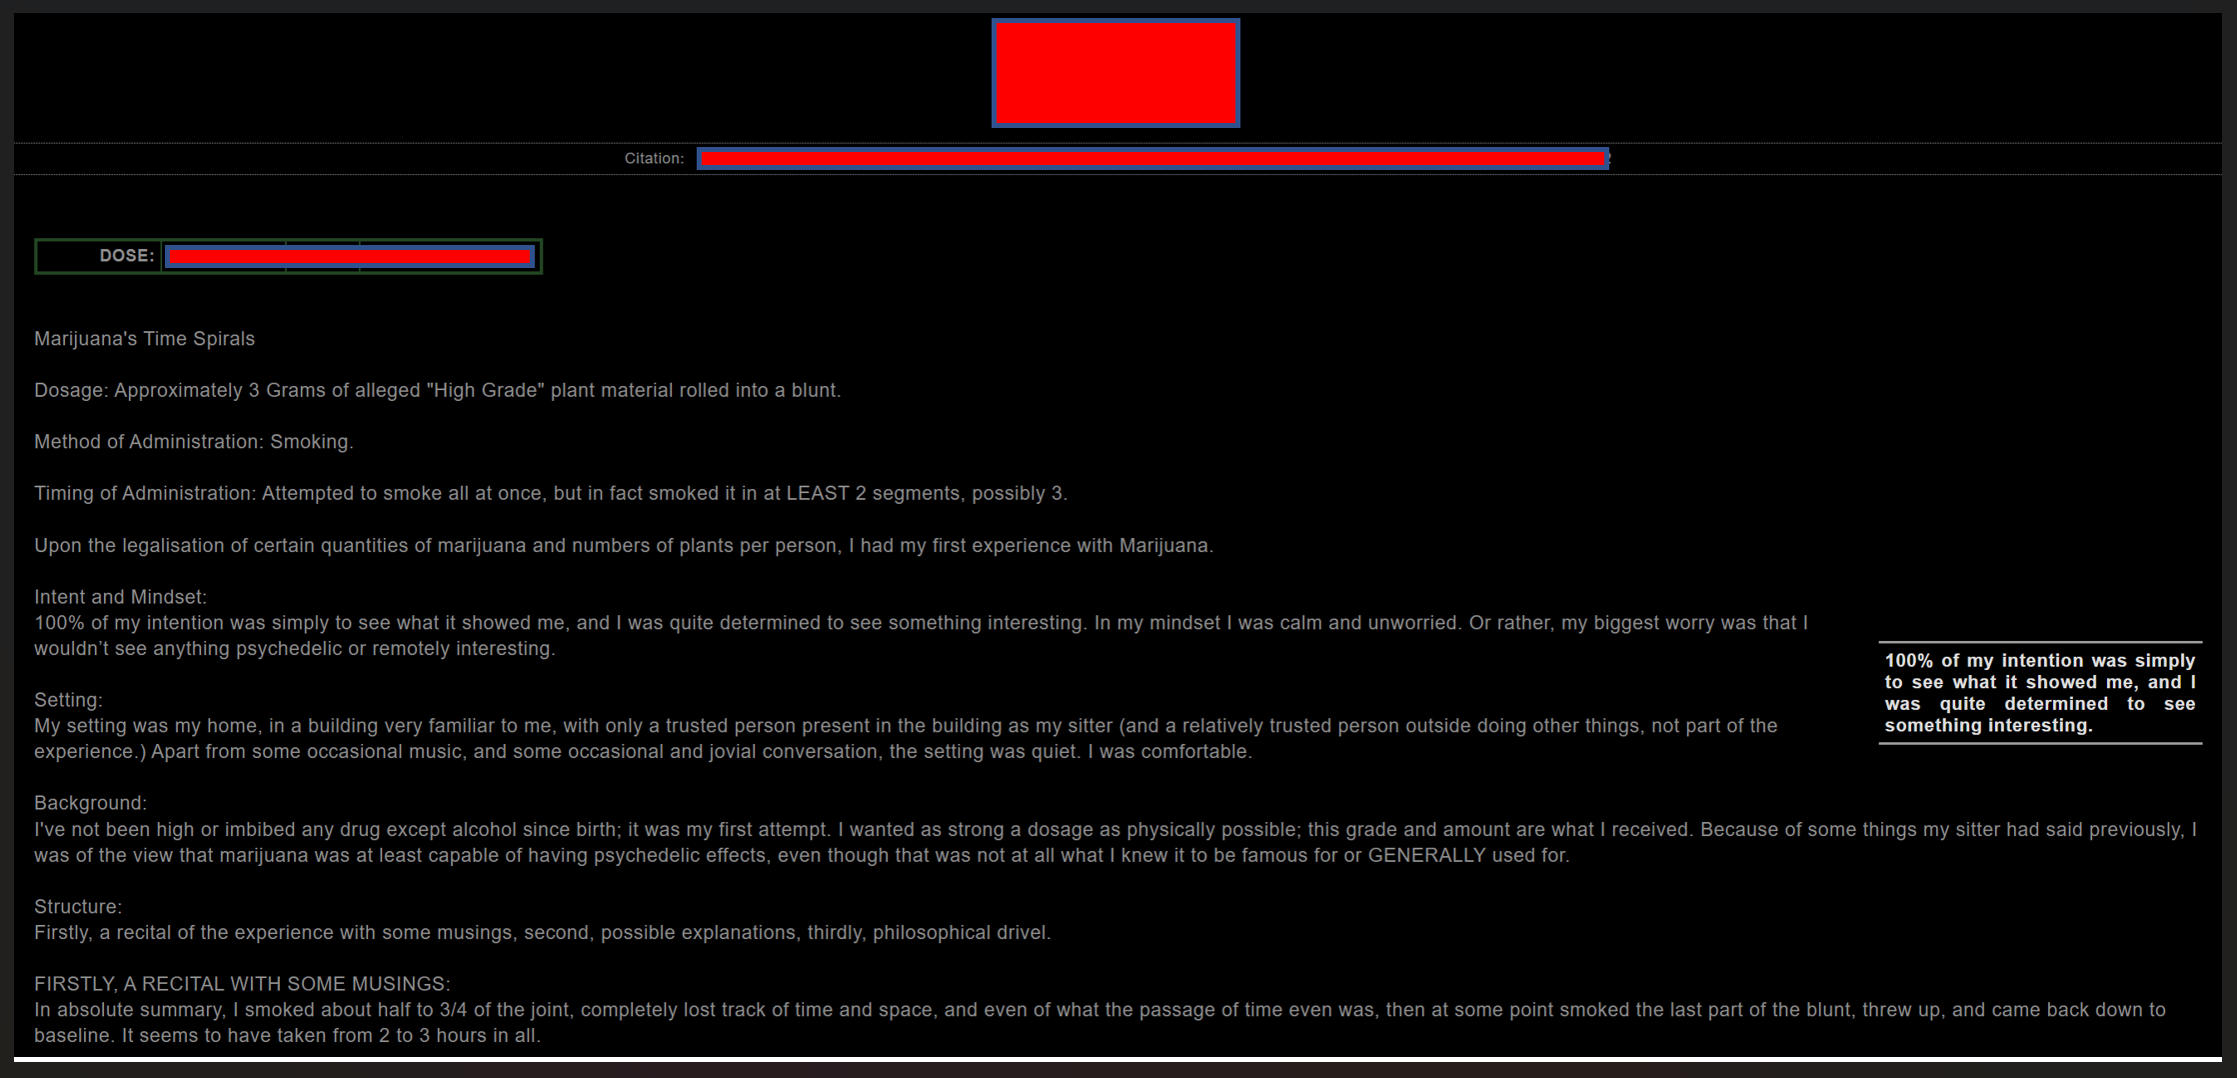

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [ ]:
#table
erowid = requests.get("https://erowid.org/experiences/exp.cgi?ShowViews=0&Cellar=0&Start=0&Max=40000").text

soup = bs(erowid, "html.parser")

table = soup.find_all("tr")[8:-7]

In [ ]:
#scrape text from single page

def scrape_page(url):
    page = requests.get(url).text
    soup = bs(page, "html.parser")
    #delete tables above and below main text
    delete_tables = soup.findAll("table")
    for delete_table in delete_tables:
        delete_table.decompose()
    #some urls redirected to other webpages, these were excluded     
    if not "This report is not available for viewing" in soup.text:
        text = soup.find(class_="report-text-surround").text
        return text


In [ ]:
#create data to dataframe from scraped and save as CSV file 

df = pd.DataFrame(columns=["title", "substance", "url", "text"])


for i in range(0,len(table)):
        print(i)
        row = table[i]
        title = row.a.text
        substance = row.findAll("td")[3].text
        report_url = "https://erowid.org/experiences/"+row.a.get("href")
        actual_url = requests.head(report_url, allow_redirects=True).url
        if actual_url == report_url:
            text = scrape_page(report_url)
            df.loc[i] = [title, substance, report_url, text]


df.to_csv('raw_data_of_all_reports.csv')